In [59]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import tqdm

In [73]:
base_df = pd.read_csv("../data/output_files/final_base_df.csv")

In [105]:
varient_list = list(set(base_df["varient"]))

In [ ]:
changed_peptides = []
for i, row in tqdm.tqdm(base_df.iterrows(), total=len(base_df)):
    try:
        tmp = list(base_df[(base_df["varient"] == "original")&(base_df["start_pos"] == row["start_pos"])&(base_df["end_pos"] == row["end_pos"])]["peptide"])[0]
    except:
        print("no peptide")
        tmp = ""
    if(row["peptide"] != tmp):
        changed_peptides.append(row["peptide"])
        changed_peptides.append(tmp)
print(changed_peptides) 

In [125]:
filtered_df = base_df[base_df.peptide.isin(changed_peptides)]
display(filtered_df.head())

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,peptide,start_pos,end_pos,varient,Chopped,HLA-A*26:01_rank,HLA-B*40:01_rank,...,HLA-B*15:01_rank,HLA-A*01:01_rank,HLA-A*02:01_rank,HLA-B*07:02_rank,HLA-B*27:05_rank,HLA-A*24:02_rank,HLA-B*58:01_rank,HLA-B*08:01_rank,HLA-A*03:01_rank,Potential
0,0,0,0,MFVFLVLL,1,8,Alpha B.1.1.7,True,46.25,44.0,...,61.25,68.333,21.618,24.484,38.0,8.903,40.5,14.162,55.714,0.0
1,1,1,1,MFVFLVLL,1,8,Beta B.1.351,True,46.25,44.0,...,61.25,68.333,21.618,24.484,38.0,8.903,40.5,14.162,55.714,0.0
2,2,2,2,MFVFLVLL,1,8,Gamma P.1,True,46.25,44.0,...,61.25,68.333,21.618,24.484,38.0,8.903,40.5,14.162,55.714,0.0
3,3,3,3,MFVFLVLL,1,8,Kappa B.1.617.1,True,46.25,44.0,...,61.25,68.333,21.618,24.484,38.0,8.903,40.5,14.162,55.714,0.0
4,4,4,4,MFVFLVLL,1,8,Delta B.1.617.2,True,46.25,44.0,...,61.25,68.333,21.618,24.484,38.0,8.903,40.5,14.162,55.714,0.0


# Chopped analysis

number of chopped by varient

In [148]:
varient_chopped_counter = {}
for varient in varient_list:
    chopped_counter = len(filtered_df[(filtered_df["varient"] == varient )&(filtered_df["Chopped"] == True)])
    not_chopped_counter = len(filtered_df[(filtered_df["varient"] == varient) & (filtered_df["Chopped"] == False)])
    varient_chopped_counter[varient] = {"chopped":chopped_counter, "not chopped":not_chopped_counter}

print(varient_chopped_counter)

{'AY.4.2': {'chopped': 53, 'not chopped': 160}, 'Omicron BA.1': {'chopped': 53, 'not chopped': 160}, 'C.1.2': {'chopped': 50, 'not chopped': 163}, 'Gamma P.1': {'chopped': 53, 'not chopped': 160}, 'Eta B.1.525': {'chopped': 50, 'not chopped': 163}, 'Lambda C.37': {'chopped': 48, 'not chopped': 165}, 'Kappa B.1.617.1': {'chopped': 53, 'not chopped': 160}, 'Delta B.1.617.2': {'chopped': 53, 'not chopped': 160}, 'Omicron BA.2': {'chopped': 50, 'not chopped': 163}, 'Beta B.1.351': {'chopped': 50, 'not chopped': 163}, 'Alpha B.1.1.7': {'chopped': 55, 'not chopped': 158}, 'Iota B.1.526': {'chopped': 50, 'not chopped': 163}, 'original': {'chopped': 54, 'not chopped': 159}, 'Mu B.1.621': {'chopped': 50, 'not chopped': 163}}


In [149]:
cols = ["varient", "Chopped?","count" ]
rows = []
for var in varient_chopped_counter:
    rows.append([var, True, varient_chopped_counter[var]["chopped"]])
    rows.append([var, False, varient_chopped_counter[var]["not chopped"]])
chopped_counter_df = pd.DataFrame(rows, columns=cols)

% of chopped by original

In [150]:
cols = ["varient", "Chopped?","count" ]
rows = []

original_chopped_counter = varient_chopped_counter["original"]["chopped"]
original_not_chopped_counter = varient_chopped_counter["original"]["not chopped"]

for var in varient_chopped_counter:
    chopped_counter = varient_chopped_counter[var]["chopped"]
    not_chopped_counter = varient_chopped_counter[var]["not chopped"]
    rows.append([var, True, 100*(chopped_counter/original_chopped_counter)-100])
    rows.append([var, False,100*not_chopped_counter/original_not_chopped_counter-100])
chopped_counter_df = pd.DataFrame(rows, columns=cols)

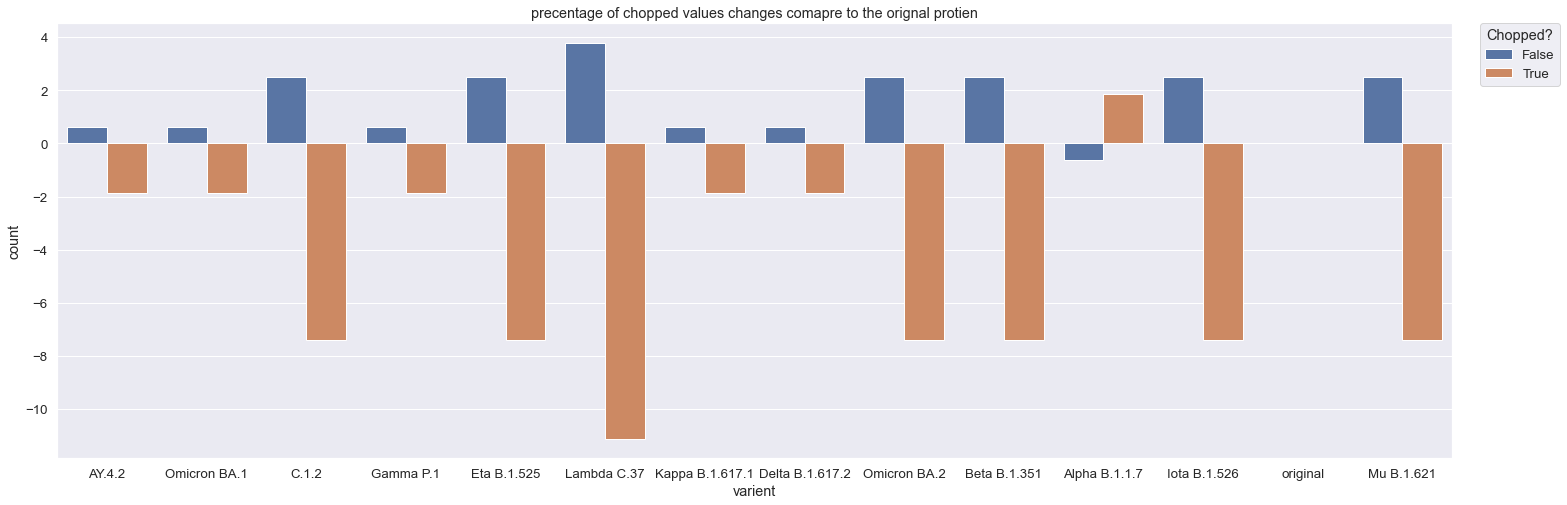

In [152]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(25,8)})
sns.set(font_scale = 1.2)
ax = sns.barplot(x="varient", y="count", hue="Chopped?", data=chopped_counter_df)

ax.set_title('precentage of chopped values changes comapre to the orignal protien')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title="Chopped?")
plt.savefig("plots/chopped-varient.png", dpi=500, bbox_inches='tight')


# bro

In [143]:
varient_chopped_counter = {}
for varient in varient_list:
    chopped_counter = len(filtered_df[(filtered_df["varient"] == varient )&(filtered_df["Potential"] > 0)])
    not_chopped_counter = len(filtered_df[(filtered_df["varient"] == varient) & (filtered_df["Potential"] == 0)])
    varient_chopped_counter[varient] = {"chopped":chopped_counter, "not chopped":not_chopped_counter}

print(varient_chopped_counter)

{'AY.4.2': {'chopped': 43, 'not chopped': 170}, 'Omicron BA.1': {'chopped': 43, 'not chopped': 170}, 'C.1.2': {'chopped': 43, 'not chopped': 170}, 'Gamma P.1': {'chopped': 25, 'not chopped': 188}, 'Eta B.1.525': {'chopped': 43, 'not chopped': 170}, 'Lambda C.37': {'chopped': 61, 'not chopped': 152}, 'Kappa B.1.617.1': {'chopped': 43, 'not chopped': 170}, 'Delta B.1.617.2': {'chopped': 43, 'not chopped': 170}, 'Omicron BA.2': {'chopped': 43, 'not chopped': 170}, 'Beta B.1.351': {'chopped': 43, 'not chopped': 170}, 'Alpha B.1.1.7': {'chopped': 45, 'not chopped': 168}, 'Iota B.1.526': {'chopped': 43, 'not chopped': 170}, 'original': {'chopped': 43, 'not chopped': 170}, 'Mu B.1.621': {'chopped': 43, 'not chopped': 170}}


In [144]:
cols = ["varient", "Chopped?","count" ]
rows = []
for var in varient_chopped_counter:
    rows.append([var, True, varient_chopped_counter[var]["chopped"]])
    rows.append([var, False, varient_chopped_counter[var]["not chopped"]])
chopped_counter_df = pd.DataFrame(rows, columns=cols)

% of chopped by original

In [145]:
cols = ["varient", "Chopped?","count" ]
rows = []

original_chopped_counter = varient_chopped_counter["original"]["chopped"]
original_not_chopped_counter = varient_chopped_counter["original"]["not chopped"]

for var in varient_chopped_counter:
    chopped_counter = varient_chopped_counter[var]["chopped"]
    not_chopped_counter = varient_chopped_counter[var]["not chopped"]
    rows.append([var, True, 100*(chopped_counter/original_chopped_counter)-100])
    rows.append([var, False,100*not_chopped_counter/original_not_chopped_counter-100])
chopped_counter_df = pd.DataFrame(rows, columns=cols)

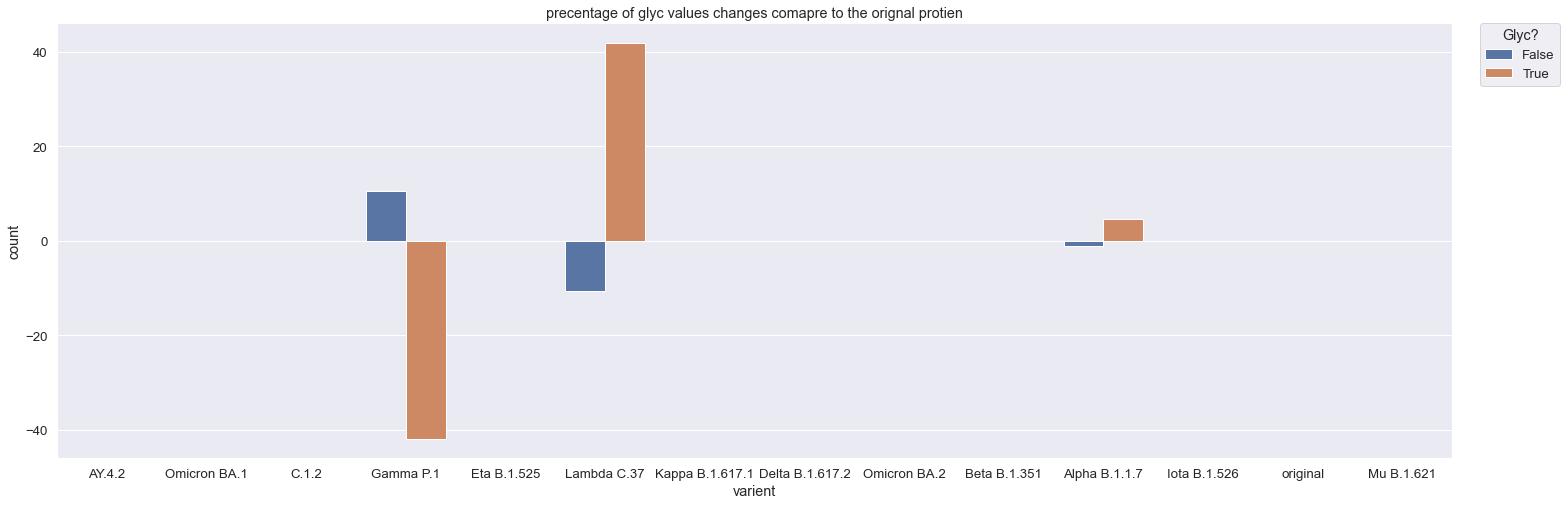

In [147]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(25,8)})
sns.set(font_scale = 1.2)
ax = sns.barplot(x="varient", y="count", hue="Chopped?", data=chopped_counter_df)

ax.set_title('precentage of glyc values changes comapre to the orignal protien')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title="Glyc?")
plt.savefig("plots/glyc-varient.png", dpi=500, bbox_inches='tight')
